In [5]:
import pandas as pd
import numpy as np

from pathlib import Path
from parse_plot_Guan2025_data import (time2min, 
                                      parse_neighbor_file, 
                                      parse_contact_file, 
                                      plt_contactArea_annotated)

In [6]:
first4cellframe = 0
minFertTo4cell = 110 ##From their GUI, all embryos tp180 -> 270min == 370 mpf 

seg_issues = [['Sample1', 198], #int cell not correctly segmented,
              ['Sample3', 160], #int cell not correctly segmented,
              ['Sample3', 170], #ABpxpappppa switched,
              ['Sample4', 201], #int cell not correctly segmented,
              ['Sample5', 166], #int cell not correctly segmented,
              ['Sample5', 179]  #virR cell not correctly segmented,
             ]

#division data from Guan et al, other timepoints manually populated from looking at segmentation/membrane data
div_info = pd.read_csv('vir_gut_div_info.csv', sep="\t", header=0, na_values='na')
div_info = div_info.set_index('item').T
div_info['int5len_min'] = time2min(div_info['int5end'], div_info['frame_rate'], first4cellframe,minFertTo4cell) \
                           - time2min(div_info['int5start'], div_info['frame_rate'], first4cellframe,minFertTo4cell)

#list of contacts_of_interest
contact_interest = pd.read_csv('contacts_of_interest.csv', sep="\t", header=0)
cat_to_use = 'contact_cat2'

#
contact_file_list = sorted(list(Path('.').rglob('*Stat.csv')))

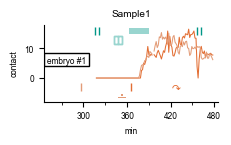

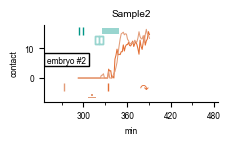

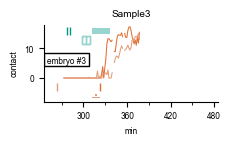

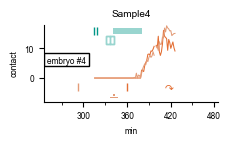

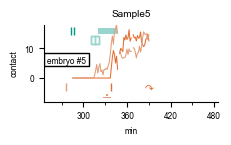

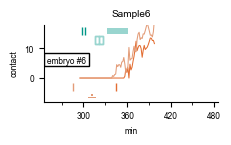

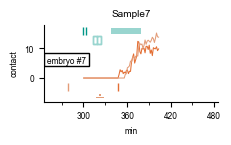

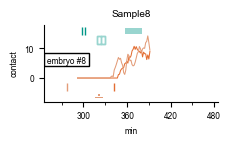

In [14]:
for i in range(0,8):
    contact_keep_sum = parse_contact_file(contact_file_list[i], contact_interest, div_info)
    #set 'contact' with seg_issues to NaN
    for s in seg_issues:
        contact_keep_sum.loc[(contact_keep_sum['embryo']==s[0]) & 
                         (contact_keep_sum['time']==s[1]) & 
                        (contact_keep_sum[cat_to_use].str.contains("gut")),
                            'contact'] = np.nan

    embryo = contact_keep_sum['embryo'].values[0]
    plt_contactArea_annotated(contact_keep_sum, 
                              embryo, 
                              div_info, 
                              output_dir = "/Users/lecote/Projects/napari/Guan_datasetC_analysis/get_interactions_plots/")

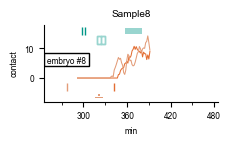

In [8]:
for i in range(7,8):
    contact_keep_sum = parse_contact_file(contact_file_list[i], contact_interest, div_info)
    #set 'contact' with seg_issues to NaN
    for s in seg_issues:
        contact_keep_sum.loc[(contact_keep_sum['embryo']==s[0]) & 
                         (contact_keep_sum['time']==s[1]) & 
                        (contact_keep_sum[cat_to_use].str.contains("gut")),
                            'contact'] = np.nan

    embryo = contact_keep_sum['embryo'].values[0]
    plt_contactArea_annotated(contact_keep_sum, embryo, div_info)
    #plt.savefig('get_interactions_plots/vir_gut_contact_v2_'+embryo+'.png', dpi=600, bbox_inches='tight')
    
#plt.savefig('get_interactions_plots/vir_gut_contact_v2_'+embryo+'.png', dpi=600, bbox_inches='tight')

In [15]:
pwd

'/Users/lecote/Downloads/OneDrive_2025-06-10/Dataset C'